In [1]:
import tensorflow as tf
import numpy as np
from datetime import datetime,timedelta

# Construction Phase


In [2]:
n_inputs=28*28
n_hidden1=300
n_hidden2=100
n_output=10


In [3]:
X=tf.placeholder(tf.float32,shape=(None,n_inputs),name='X')
y=tf.placeholder(tf.int64,shape=(None),name='y')

In [4]:
from tensorflow.contrib.layers import fully_connected

In [5]:
with tf.name_scope("dnn"):
    hidden1=fully_connected(X,n_hidden1,scope='hidden1')
    hidden2=fully_connected(hidden1,n_hidden2,scope='hidden2')
    logits=fully_connected(hidden2,n_output,scope="outputs",activation_fn=None)

In [6]:
with tf.name_scope("loss"):
    xentropy=tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,labels=y)
    loss=tf.reduce_mean(xentropy,name='loss')

In [7]:
learning_rate=0.01
with tf.name_scope("train"):
    optimizer=tf.train.GradientDescentOptimizer(learning_rate)
    training_op=optimizer.minimize(loss)

In [8]:
with tf.name_scope('eval'):
    correct=tf.nn.in_top_k(logits,y,1)
    accuracy=tf.reduce_mean(tf.cast(correct,tf.float32))

In [9]:
init=tf.global_variables_initializer()
saver=tf.train.Saver()

# Execution Phase

In [10]:
from tensorflow.examples.tutorials.mnist import input_data


In [11]:
mnist=input_data.read_data_sets('/tmp/data/')

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [12]:
n_epochs=400
batch_size=100

In [13]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        t1=datetime.now()
        for iteration in range(mnist.train.num_examples//batch_size):
            X_batch,y_batch=mnist.train.next_batch(batch_size)
            sess.run(training_op,feed_dict={X:X_batch,y:y_batch})
        acc_train=accuracy.eval(feed_dict={X:X_batch,y:y_batch})
        acc_test=accuracy.eval(feed_dict={X:mnist.test.images,y:mnist.test.labels})
        t2=datetime.now()
        tot_sec=((t2-t1).total_seconds())*(n_epochs-epoch)
        eta=timedelta(seconds=tot_sec)#.strftime('%H.%M:%S')
        print(f'{epoch}-Train acc:{acc_train} Test acc:{acc_test} ETA:{eta}')
    save_path=saver.save(sess,r'C:\Users\Mohit Goel\Desktop\Project\my_model_final.ckpt')

0-Train acc:0.8700000047683716 Test acc:0.8788999915122986 ETA:0:42:08.161600
1-Train acc:0.8899999856948853 Test acc:0.9036999940872192 ETA:0:43:00.938283
2-Train acc:0.9300000071525574 Test acc:0.9156000018119812 ETA:0:42:37.190994
3-Train acc:0.949999988079071 Test acc:0.9218999743461609 ETA:0:43:30.002658
4-Train acc:0.8700000047683716 Test acc:0.9266999959945679 ETA:0:42:46.858932
5-Train acc:0.9700000286102295 Test acc:0.9314000010490417 ETA:0:42:42.852035
6-Train acc:0.9399999976158142 Test acc:0.9337999820709229 ETA:0:42:27.345536
7-Train acc:0.9300000071525574 Test acc:0.9361000061035156 ETA:0:42:37.388943
8-Train acc:0.9399999976158142 Test acc:0.9409000277519226 ETA:0:42:28.992544
9-Train acc:0.9800000190734863 Test acc:0.9412000179290771 ETA:0:42:21.712313
10-Train acc:0.9300000071525574 Test acc:0.9445000290870667 ETA:0:41:56.454330
11-Train acc:0.9700000286102295 Test acc:0.9455999732017517 ETA:0:43:19.432205
12-Train acc:0.9599999785423279 Test acc:0.9478999972343445 ETA

111-Train acc:1.0 Test acc:0.9797999858856201 ETA:0:30:40.113864
112-Train acc:1.0 Test acc:0.9797000288963318 ETA:0:30:38.057760
113-Train acc:1.0 Test acc:0.9797000288963318 ETA:0:30:35.611246
114-Train acc:1.0 Test acc:0.9797999858856201 ETA:0:30:23.274882
115-Train acc:1.0 Test acc:0.9804999828338623 ETA:0:30:21.439845
116-Train acc:1.0 Test acc:0.9800000190734863 ETA:0:30:14.141164
117-Train acc:1.0 Test acc:0.9807000160217285 ETA:0:30:02.839614
118-Train acc:1.0 Test acc:0.9803000092506409 ETA:0:29:00.426168
119-Train acc:1.0 Test acc:0.9799000024795532 ETA:0:29:09.608565
120-Train acc:1.0 Test acc:0.9799000024795532 ETA:0:29:46.928080
121-Train acc:1.0 Test acc:0.9803000092506409 ETA:0:29:40.052922
122-Train acc:1.0 Test acc:0.9797999858856201 ETA:0:29:47.272286
123-Train acc:0.9900000095367432 Test acc:0.9799000024795532 ETA:0:30:04.419827
124-Train acc:1.0 Test acc:0.9796000123023987 ETA:0:29:27.008580
125-Train acc:1.0 Test acc:0.9800999760627747 ETA:0:29:12.534300
126-Train 

237-Train acc:1.0 Test acc:0.9794999957084656 ETA:0:17:14.511937
238-Train acc:1.0 Test acc:0.9790999889373779 ETA:0:17:15.512910
239-Train acc:1.0 Test acc:0.9797000288963318 ETA:0:17:11.895368
240-Train acc:1.0 Test acc:0.9800000190734863 ETA:0:17:12.752000
241-Train acc:1.0 Test acc:0.9794999957084656 ETA:0:16:55.417407
242-Train acc:1.0 Test acc:0.9794999957084656 ETA:0:16:45.737308
243-Train acc:1.0 Test acc:0.9799000024795532 ETA:0:16:41.861745
244-Train acc:1.0 Test acc:0.9799000024795532 ETA:0:16:38.484084
245-Train acc:1.0 Test acc:0.9796000123023987 ETA:0:16:29.672830
246-Train acc:1.0 Test acc:0.9797000288963318 ETA:0:16:26.034434
247-Train acc:1.0 Test acc:0.9796000123023987 ETA:0:16:22.746693
248-Train acc:1.0 Test acc:0.9793999791145325 ETA:0:16:15.557584
249-Train acc:1.0 Test acc:0.9796000123023987 ETA:0:16:02.084269
250-Train acc:1.0 Test acc:0.9794999957084656 ETA:0:15:55.961550
251-Train acc:1.0 Test acc:0.9796000123023987 ETA:0:15:46.568988
252-Train acc:1.0 Test ac

364-Train acc:1.0 Test acc:0.9797000288963318 ETA:0:03:49.786272
365-Train acc:1.0 Test acc:0.9797999858856201 ETA:0:03:43.610415
366-Train acc:1.0 Test acc:0.9799000024795532 ETA:0:03:37.054470
367-Train acc:1.0 Test acc:0.9799000024795532 ETA:0:03:30.980814
368-Train acc:1.0 Test acc:0.9799000024795532 ETA:0:03:24.739136
369-Train acc:1.0 Test acc:0.9800999760627747 ETA:0:03:18.183558
370-Train acc:1.0 Test acc:0.9800000190734863 ETA:0:03:11.753430
371-Train acc:1.0 Test acc:0.9797000288963318 ETA:0:03:05.353297
372-Train acc:1.0 Test acc:0.9800000190734863 ETA:0:02:58.910284
373-Train acc:1.0 Test acc:0.9799000024795532 ETA:0:02:52.207404
374-Train acc:1.0 Test acc:0.9797000288963318 ETA:0:02:46.344282
375-Train acc:1.0 Test acc:0.9797000288963318 ETA:0:02:39.946750
376-Train acc:1.0 Test acc:0.9797999858856201 ETA:0:02:33.158112
377-Train acc:1.0 Test acc:0.9800000190734863 ETA:0:02:26.961329
378-Train acc:1.0 Test acc:0.9799000024795532 ETA:0:02:20.210510
379-Train acc:1.0 Test ac

# Testing


In [14]:
import cv2

In [15]:
X_test=cv2.imread('Test_Images/7.jpg')

In [16]:
X_test=cv2.cvtColor(X_test,cv2.COLOR_BGR2GRAY)

In [17]:
X_test=X_test.flatten()

In [18]:
from sklearn.preprocessing import scale
X_test = scale( X_test, with_mean=True, with_std=True, copy=True )

c:\python36\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [19]:
Xn=X_test.reshape((1,784))

In [20]:
 with tf.Session() as sess:
        saver.restore(sess,'my_model_final.ckpt')
        Z=logits.eval(feed_dict={X:Xn})
        y_pred=np.argmax(Z,axis=1)

INFO:tensorflow:Restoring parameters from my_model_final.ckpt


In [21]:
y_pred

array([7], dtype=int64)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

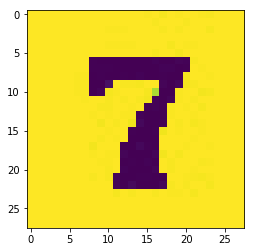

In [24]:
plt.imshow(X_test.reshape((28,28)))